In [8]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 让画图内置
%matplotlib inline

# 忽略版本号之类的warnings
import warnings
warnings.filterwarnings('ignore')
import os
from datetime import date

# 数据导入

In [3]:
# 导入数据
# original_data = pd.read_csv('data\processed_data.csv')
# data = original_data.copy()
# data.shape

In [4]:
# 导入数据
data = pd.read_csv('data\processed_data.csv')
data.shape

(42413557, 11)

In [5]:
data['event_time'] = pd.to_datetime(data['event_time'])
data['category_code'] = data['category_code'].astype('category')
data['brand'] = data['brand'].astype('category')

data['event_day'] = data['event_time'].dt.date
data['event_hour'] = data['event_time'].dt.hour

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42413557 entries, 0 to 42413556
Data columns (total 13 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   event_type     object        
 2   product_id     int64         
 3   category_id    int64         
 4   category_code  category      
 5   brand          category      
 6   price          float64       
 7   user_id        int64         
 8   category       object        
 9   sub_category   object        
 10  product_name   object        
 11  event_day      object        
 12  event_hour     int32         
dtypes: category(2), datetime64[ns](1), float64(1), int32(1), int64(3), object(5)
memory usage: 3.4+ GB


In [11]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,category,sub_category,product_name,event_day,event_hour
0,2019-10-01 00:00:00,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,NaN,NaN,NaN,2019-10-01,0
1,2019-10-01 00:00:00,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,appliances,environment,water_heater,2019-10-01,0
2,2019-10-01 00:00:01,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,furniture,living_room,sofa,2019-10-01,0
3,2019-10-01 00:00:01,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,computers,notebook,notebook,2019-10-01,0
4,2019-10-01 00:00:04,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,electronics,smartphone,smartphone,2019-10-01,0


# 销售转化
- 只考虑行为次数， 不考虑 价格/人数/商品数

# 行为数 下单转化率
- behavior_info

In [12]:
# 各行为计数
behavior_info = data.groupby('event_type').agg({'event_type': 'count'}).unstack().unstack()
behavior_info['conversion_rate'] = behavior_info['purchase'] / behavior_info['view']
behavior_info

event_type,cart,purchase,view,conversion_rate
event_type,898443,742773,40772341,0.018218


## 分日 

In [17]:
behavior_info_byday = data.groupby(['event_day', 'event_type']).agg({'event_type': 'count'}).unstack()
behavior_info_byday.columns = ['cart','purchase','view']
behavior_info_byday['conversion_rate(%)'] = (behavior_info_byday['purchase'] / behavior_info_byday['view']*100)
behavior_info_byday

,cart,purchase,view,conversion_rate(%)
event_day,,,,
2019-10-01,16193,19305,1208165,1.60
2019-10-02,16871,19469,1154436,1.69
2019-10-03,18702,19255,1088577,1.77
2019-10-04,42657,27039,1346162,2.01
2019-10-05,34564,23492,1271176,1.85
2019-10-06,30995,22169,1263876,1.75
2019-10-07,17570,21378,1160929,1.84
2019-10-08,17952,23071,1328893,1.74
2019-10-09,17886,22747,1306089,1.74


In [18]:
behavior_info_byday.describe()

,cart,purchase,view,conversion_rate(%)
count,31.00,31.00,31.00,31.00
mean,28982.03,23960.42,1315236.81,1.82
std,10576.36,3083.45,111084.61,0.13
min,16193.00,19255.00,1088577.00,1.60
25%,17919.00,21685.00,1232293.00,1.74
50%,33147.00,23883.00,1328893.00,1.78
75%,37156.00,25616.00,1383097.00,1.87
max,48066.00,31393.00,1584488.00,2.17


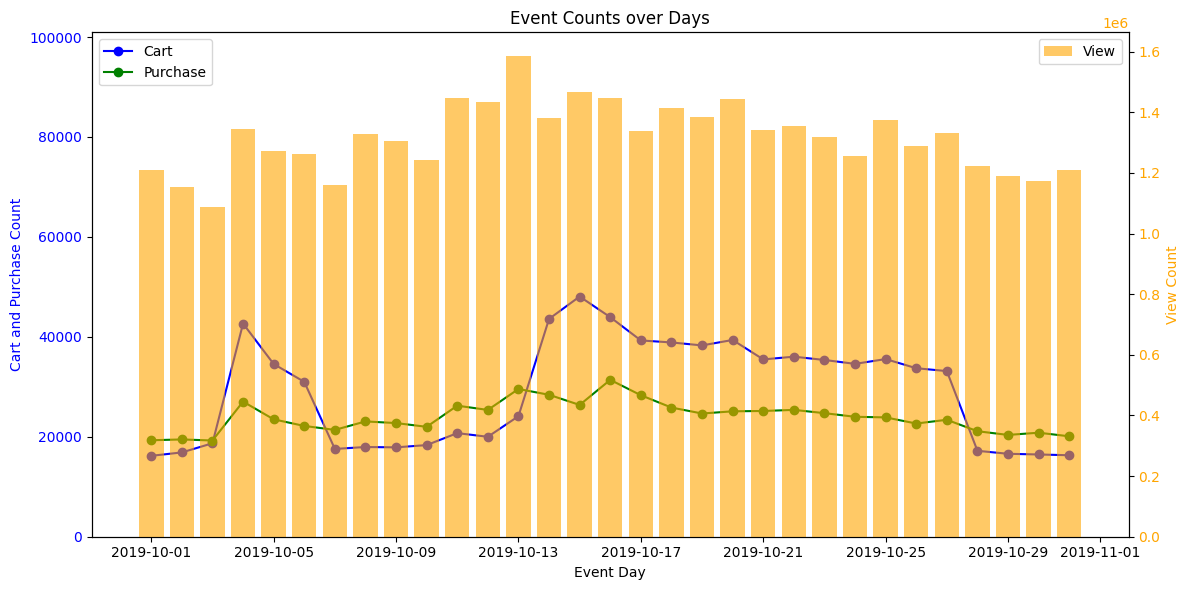

In [21]:
# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 cart 和 purchase 的折线图
ax1.plot(behavior_info_byday.index, behavior_info_byday['cart'], color='blue', marker='o', label='Cart')
ax1.plot(behavior_info_byday.index, behavior_info_byday['purchase'], color='green', marker='o', label='Purchase')
ax1.set_ylabel('Cart and Purchase Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0,top = behavior_info_byday['cart'].max() *2.1)

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制 view 的柱状图
ax2.bar(behavior_info_byday.index, behavior_info_byday['view'], color='orange', alpha=0.6, label='View')
ax2.set_ylabel('View Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 添加标题和 x 轴标签
plt.title('Event Counts over Days')
ax1.set_xlabel('Event Day')



# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 自动调整布局
fig.tight_layout()
plt.show()

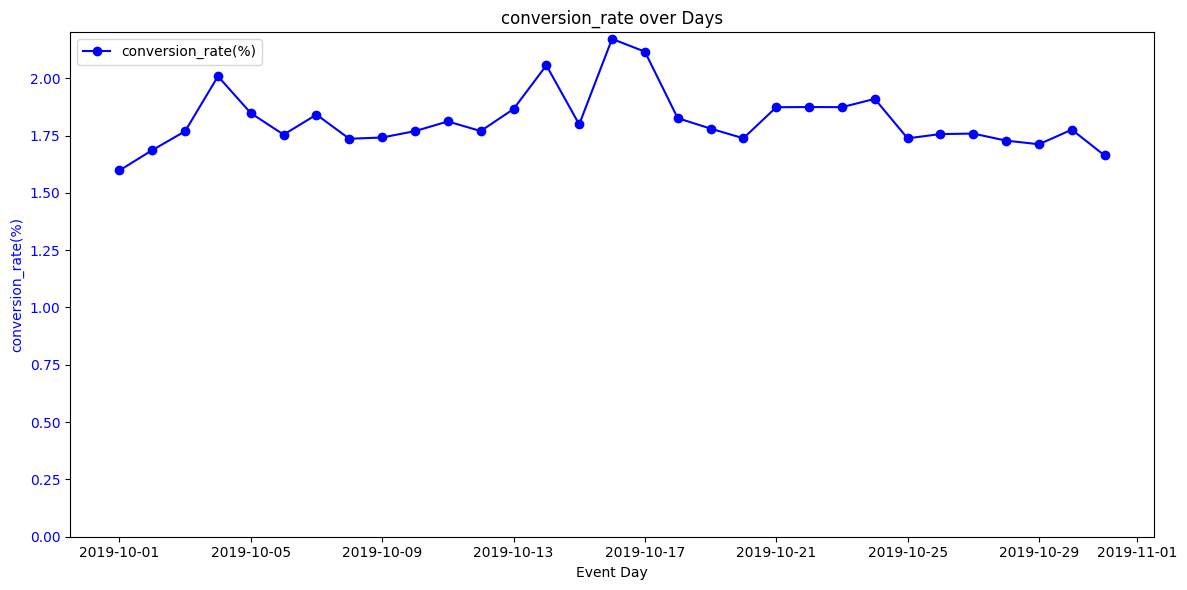

In [26]:
# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 cart 和 purchase 的折线图
ax1.plot(behavior_info_byday.index, behavior_info_byday['conversion_rate(%)'], color='blue', marker='o', label='conversion_rate(%)')
ax1.set_ylabel('conversion_rate(%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0)

# 添加标题和 x 轴标签
plt.title('conversion_rate over Days')
ax1.set_xlabel('Event Day')

# 显示图例
ax1.legend(loc='upper left')

# 自动调整布局
fig.tight_layout()
plt.show()

## 分时

In [28]:
behavior_info_byhour = data.groupby(['event_hour', 'event_type']).agg({'event_type': 'count'}).unstack()
behavior_info_byhour.columns = ['cart','purchase','view']
behavior_info_byhour['conversion_rate'] = (behavior_info_byhour['purchase'] / behavior_info_byhour['view']*100)
behavior_info_byhour

,cart,purchase,view,conversion_rate
event_hour,,,,
0,3869,2949,299740,0.98
1,7525,5526,545513,1.01
2,17279,13968,1036894,1.35
3,33642,29632,1485498,1.99
4,46636,41143,1826073,2.25
5,55476,48068,2020202,2.38
6,60607,52002,2154159,2.41
7,62460,53404,2217399,2.41
8,65016,55195,2267568,2.43


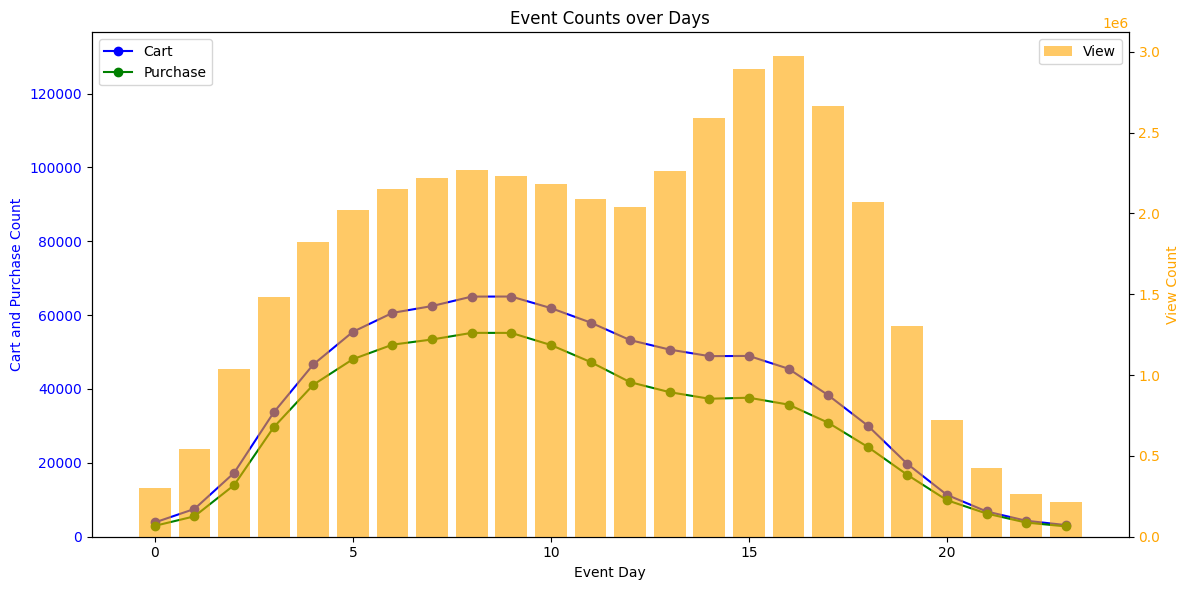

In [26]:
# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 cart 和 purchase 的折线图
ax1.plot(behavior_info_byhour.index, behavior_info_byhour['cart'], color='blue', marker='o', label='Cart')
ax1.plot(behavior_info_byhour.index, behavior_info_byhour['purchase'], color='green', marker='o', label='Purchase')
ax1.set_ylabel('Cart and Purchase Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0,top = behavior_info_byhour['cart'].max() *2.1)

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制 view 的柱状图
ax2.bar(behavior_info_byhour.index, behavior_info_byhour['view'], color='orange', alpha=0.6, label='View')
ax2.set_ylabel('View Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 添加标题和 x 轴标签
plt.title('Event Counts over Days')
ax1.set_xlabel('Event Day')


# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 自动调整布局
fig.tight_layout()
plt.show()

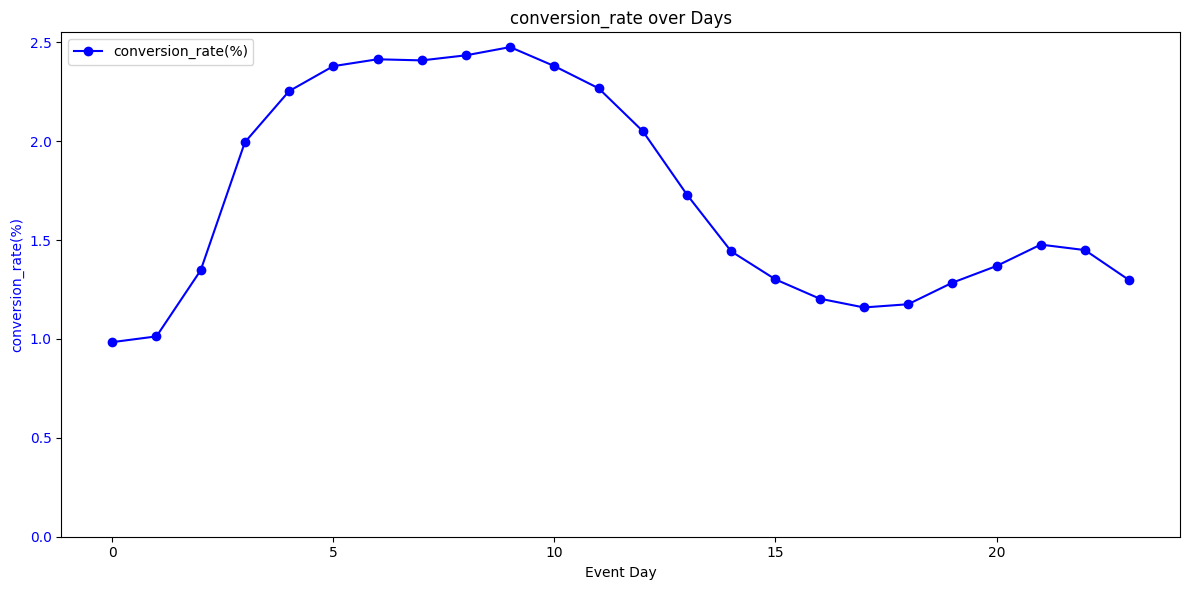

In [29]:
# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 cart 和 purchase 的折线图
ax1.plot(behavior_info_byhour.index, behavior_info_byhour['conversion_rate'], color='blue', marker='o', label='conversion_rate(%)')
ax1.set_ylabel('conversion_rate(%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim(bottom=0)

# 添加标题和 x 轴标签
plt.title('conversion_rate over Days')
ax1.set_xlabel('Event Day')

# 显示图例
ax1.legend(loc='upper left')

# 自动调整布局
fig.tight_layout()
plt.show()

## 按商品特征

### 分品牌

In [28]:
behavior_info_bybrand = data.groupby(['brand', 'event_type']).agg({'event_type': 'count'}).unstack()
behavior_info_bybrand.columns = ['cart','purchase','view']
behavior_info_bybrand['conversion_rate'] = (behavior_info_bybrand['purchase'] / behavior_info_bybrand['view']*100).astype(str).apply(lambda x: x[:4]) + '%'
behavior_info_bybrand.query('purchase > 10').sort_values(by='purchase', ascending=False)

,cart,purchase,view,conversion_rate
brand,,,,
samsung,292039,172878,4805678,3.59%
apple,203757,142858,3769841,3.78%
xiaomi,101951,56609,2922092,1.93%
huawei,40753,23499,1045367,2.24%
lucente,0,11576,644157,1.79%
...,...,...,...,...
art-visage,0,11,964,1.14%
resanta,15,11,1174,0.93%
ladida,2,11,1608,0.68%


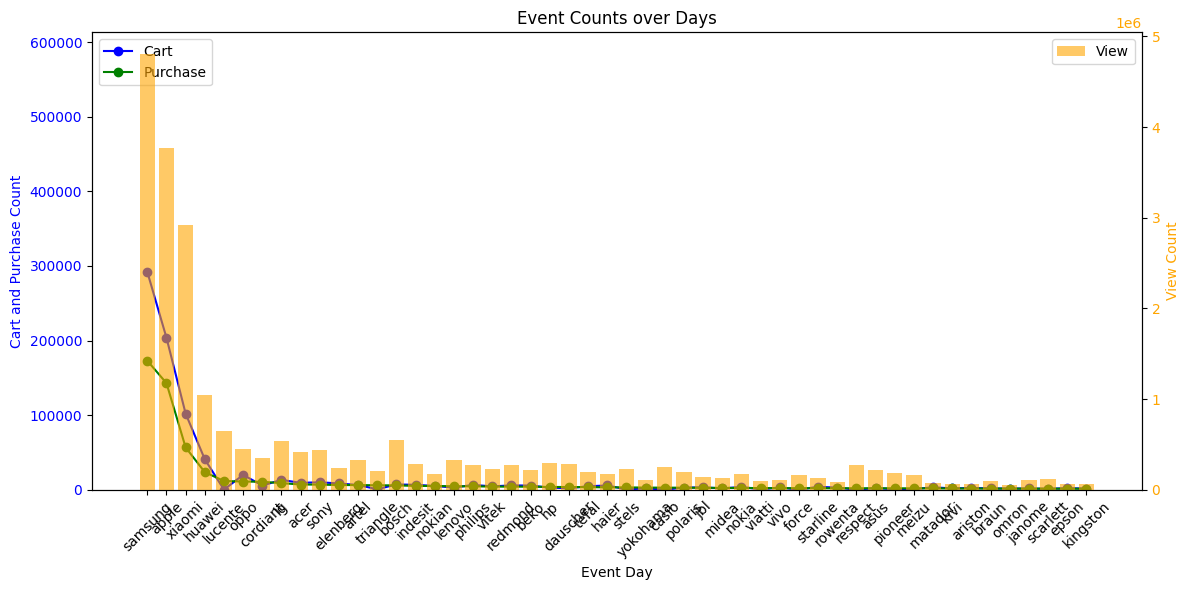

In [35]:
behavior_info_bybrand_plot = behavior_info_bybrand.query('purchase > 10').sort_values(by='purchase', ascending=False)[:50]


# 创建一个双轴图
fig, ax1 = plt.subplots(figsize=(12, 6))

# 绘制 cart 和 purchase 的折线图
ax1.plot(behavior_info_bybrand_plot.index, behavior_info_bybrand_plot['cart'], color='blue', marker='o', label='Cart')
ax1.plot(behavior_info_bybrand_plot.index, behavior_info_bybrand_plot['purchase'], color='green', marker='o', label='Purchase')
ax1.set_ylabel('Cart and Purchase Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(bottom=0,top = behavior_info_bybrand_plot['cart'].max() *2.1)

# 创建第二个 y 轴
ax2 = ax1.twinx()

# 绘制 view 的柱状图
ax2.bar(behavior_info_bybrand_plot.index, behavior_info_bybrand_plot['view'], color='orange', alpha=0.6, label='View')
ax2.set_ylabel('View Count', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# 添加标题和 x 轴标签
plt.title('Event Counts over Days')
ax1.set_xlabel('Event Day')


# 显示图例
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 自动调整布局
fig.tight_layout()
plt.show()

### 分类别

In [ ]:
behavior_info_bycategory = data.groupby(['category', 'event_type']).agg({'event_type': 'count'}).unstack()
behavior_info_bycategory.columns = ['cart','purchase','view']
behavior_info_bycategory['conversion_rate'] = (behavior_info_bycategory['purchase'] / behavior_info_bycategory['view']*100).astype(str).apply(lambda x: x[:4]) + '%'
behavior_info_bycategory.query('purchase > 0').sort_values(by='conversion_rate', ascending=False)

,cart,purchase,view,conversion_rate
category,,,,
electronics,653158,422979,15035552,2.81%
medicine,514,310,13974,2.21%
stationery,106,134,7380,1.81%
appliances,89371,74988,4799522,1.56%
computers,26821,27853,2268655,1.22%
construction,10081,7801,712635,1.09%
kids,2534,5482,512260,1.07%
auto,8916,10619,993338,1.06%
sport,1015,1236,174292,0.70%


### 分小类

In [ ]:
behavior_info_bysubcat = data.groupby(['category', 'sub_category','event_type']).agg({'event_type': 'count'}).unstack()
behavior_info_bysubcat.columns = ['cart','purchase','view']
behavior_info_bysubcat['conversion_rate'] = (behavior_info_bysubcat['purchase'] / behavior_info_bysubcat['view']*100).astype(str).apply(lambda x: x[:4]) + '%'
behavior_info_bysubcat.query('purchase > 0').sort_values(by='conversion_rate', ascending=False)

,,cart,purchase,view,conversion_rate
category,sub_category,,,,
electronics,smartphone,532007.0,337979.0,10617327.0,3.18%
kids,fmcg,98.0,768.0,24199.0,3.17%
electronics,audio,51393.0,35590.0,1486132.0,2.39%
appliances,iron,3967.0,3652.0,157630.0,2.31%
medicine,tools,514.0,310.0,13974.0,2.21%
electronics,video,35174.0,21643.0,1068782.0,2.02%
appliances,ironing_board,350.0,664.0,34264.0,1.93%
electronics,tablet,8809.0,5602.0,301953.0,1.85%
stationery,cartrige,106.0,134.0,7380.0,1.81%


### 分商品

In [ ]:
behavior_info_bypname = data.groupby(['product_name','event_type']).agg({'event_type': 'count'}).unstack()
behavior_info_bypname.columns = ['cart','purchase','view']
behavior_info_bypname['conversion_rate'] = (behavior_info_bypname['purchase'] / behavior_info_bypname['view']*100).astype(str).apply(lambda x: x[:4]) + '%'
behavior_info_bypname.query('purchase > 0').sort_values(by='conversion_rate', ascending=False)

,cart,purchase,view,conversion_rate
product_name,,,,
smartphone,532007.0,337979.0,10617327.0,3.18%
diapers,98.0,768.0,24199.0,3.17%
headphone,49886.0,30501.0,1018333.0,2.99%
iron,3967.0,3652.0,157630.0,2.31%
microwave,4627.0,3708.0,164944.0,2.24%
...,...,...,...,...
soldering,NaN,1.0,631.0,0.15%
slipons,NaN,8.0,5677.0,0.14%
trousers,NaN,22.0,16091.0,0.13%


# 用户流量图

## 用户行为路径 计数

In [ ]:
sub_data = data[['event_type','user_id','product_id']]
sub_data

,event_type,user_id,product_id
0,view,541312140,44600062
1,view,554748717,3900821
2,view,519107250,17200506
3,view,550050854,1307067
4,view,535871217,1004237
...,...,...,...
42413552,view,537931532,2300275
42413553,view,527322328,10800172
42413554,view,566280422,5701038
42413555,view,513118352,21407424


In [ ]:
user_route = sub_data.groupby(['product_id','user_id','event_type']).agg({'event_type': 'nunique'}).unstack().fillna(0)
user_route

event_type              
event_type                 cart purchase view
product_id user_id                           
1000978    489962790        0.0      0.0  1.0
           490574809        0.0      0.0  1.0
           493091524        0.0      0.0  1.0
           502430435        0.0      0.0  1.0
           503271412        0.0      0.0  1.0
...                         ...      ...  ...
60500009   562570257        0.0      0.0  1.0
           565573952        0.0      0.0  1.0
60500010   513174842        0.0      0.0  1.0
           544126884        0.0      0.0  1.0
           544240256        0.0      0.0  1.0

[23307630 rows x 3 columns]

In [ ]:
user_route.columns   = ['cart','purchase','view']
user_route = user_route[['view','cart','purchase']]
user_route 

view  cart  purchase
product_id user_id                        
1000978    489962790   1.0   0.0       0.0
           490574809   1.0   0.0       0.0
           493091524   1.0   0.0       0.0
           502430435   1.0   0.0       0.0
           503271412   1.0   0.0       0.0
...                    ...   ...       ...
60500009   562570257   1.0   0.0       0.0
           565573952   1.0   0.0       0.0
60500010   513174842   1.0   0.0       0.0
           544126884   1.0   0.0       0.0
           544240256   1.0   0.0       0.0

[23307630 rows x 3 columns]

In [ ]:
user_route['rounte'] = user_route.astype(int).astype(str).agg('-'.join, axis=1)
user_route

view  cart  purchase rounte
product_id user_id                               
1000978    489962790   1.0   0.0       0.0  1-0-0
           490574809   1.0   0.0       0.0  1-0-0
           493091524   1.0   0.0       0.0  1-0-0
           502430435   1.0   0.0       0.0  1-0-0
           503271412   1.0   0.0       0.0  1-0-0
...                    ...   ...       ...    ...
60500009   562570257   1.0   0.0       0.0  1-0-0
           565573952   1.0   0.0       0.0  1-0-0
60500010   513174842   1.0   0.0       0.0  1-0-0
           544126884   1.0   0.0       0.0  1-0-0
           544240256   1.0   0.0       0.0  1-0-0

[23307630 rows x 4 columns]

In [ ]:
user_route['rounte'].value_counts()

rounte
1-0-0    22509736
1-0-1      298539
1-1-1      259544
1-1-0      239130
0-1-0         280
0-0-1         259
0-1-1         142
Name: count, dtype: int64

## **用户行为流向图**

In [30]:
import plotly.graph_objects as go

# 创建流量图
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=["PV", "Cart", "Purchase", "Drop-off"],
    ),
    link=dict(
        source=[0, 0, 0, 1, 1],  # PV -> Cart, pv -> Purchase, pv -> Drop-off, Cart -> Purchase, Cart -> Drop-off
        target=[3, 2, 1, 2, 3],
        value=[22509730,298539,498674,259544,239130]
    )
))

fig.update_layout(title_text="用户行为流向图", font_size=10)
fig.show()

In [ ]:
# pyecharts画流量图
from pyecharts import options as opts
from pyecharts.charts import Sankey
# 定义节点和链接数据
nodes = [
    {"name": "View"},
    {"name": "Cart"},
    {"name": "Purchase"},
    {"name": "Drop-off"},
]

links = [
    {"source": "View", "target": "Cart", "value": 498674},
    {"source": "View", "target": "Purchase", "value": 298539},
    {"source": "View", "target": "Drop-off", "value": 2250973},
    {"source": "Cart", "target": "Purchase", "value": 259544},
    {"source": "Cart", "target": "Drop-off", "value": 239130},

]
# 创建桑基图对象
sankey = Sankey()

# 添加数据
sankey.add("", nodes, links, linestyle_opt=opts.LineStyleOpts(opacity=0.2, curve=0.5, color="source"), label_opts=opts.LabelOpts(position="right"))

# 设置全局选项
sankey.set_global_opts(title_opts=opts.TitleOpts(title="桑基图示例"))

sankey.render("sankey_chart.html")


'c:\\Users\\29610\\Desktop\\REES46 ecommerce dataset\\sankey_chart.html'

## 下单路径分析

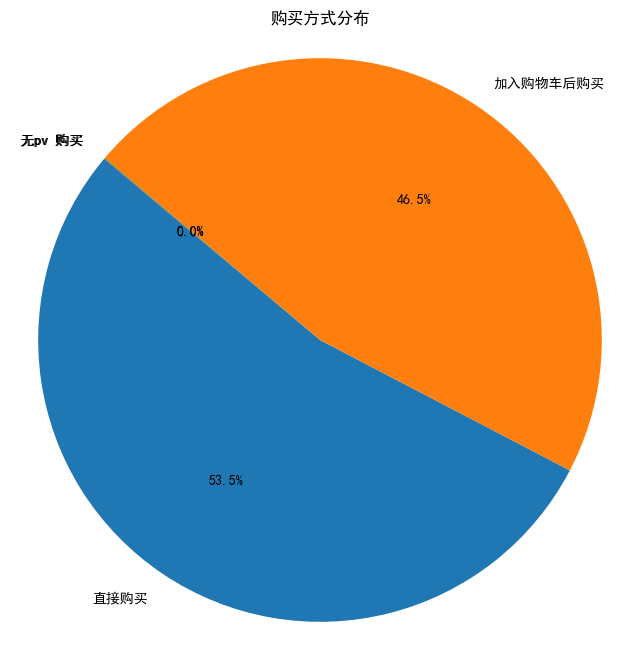

In [38]:
""" 
用户行为路径中，最后下单的是
1-0-1      298539  直接购买
1-1-1      259544  加入购物车后购买
0-0-1         259  无pv 直接购买
0-1-1         142  无pv 加入购物车后购买

"""
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为 SimHei
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题

# 创建数据
pie_data = {
    'category': [
        '直接购买',
        '加入购物车后购买',
        '无pv 购买',
        '无pv 购买'
    ],
    'count': [
        298539,
        259544,
        259,
        142
    ]
}

# 创建 DataFrame
df = pd.DataFrame(pie_data)

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(df['count'], labels=df['category'], autopct='%1.1f%%', startangle=140)
plt.title('购买方式分布')
plt.axis('equal')  # 确保饼图是圆形
plt.show()